In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
from qiskit.providers.ibmq.job import job_monitor
provider = IBMQ.load_account()

/tmp/ipykernel_252/2779030276.py:10: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  provider = IBMQ.load_account()


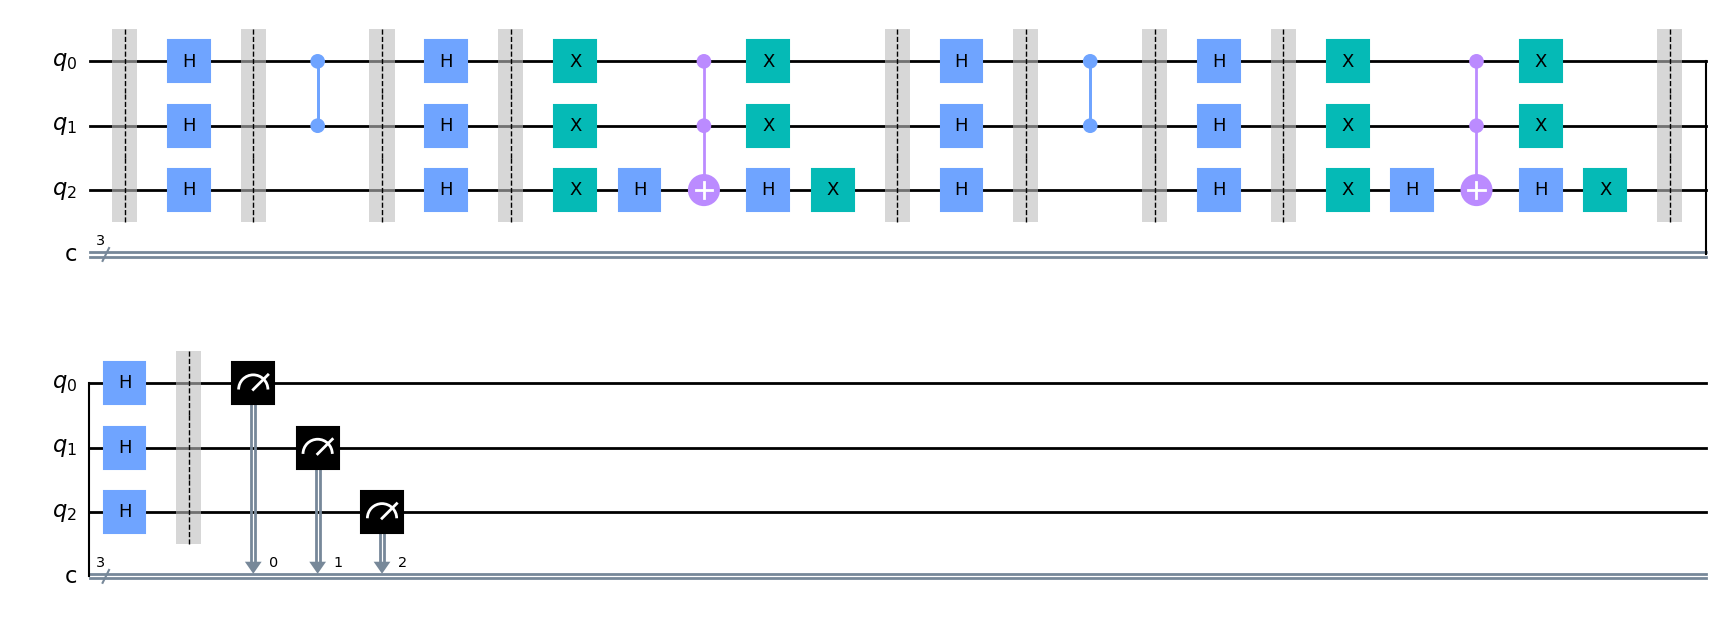

In [2]:
#量子ビット数と古典ビット数
q = 3
c = 3


#全ての古典bitにアダマールをかける回路。オラクル回路と位相回路の間に挟む
circ_h = QuantumCircuit(q, c)
circ_h.barrier()
for i in range(0,q):
    circ_h.h(i)


#オラクル回路
circ_o = QuantumCircuit(q, c)
circ_o.barrier()

#1が解
#circ_o.x(2)
#circ_o.h(2)
#circ_o.cx(0,1)
#circ_o.ccx(0,1,2)
#circ_o.cx(0,1)
#circ_o.h(2)
#circ_o.x(2)


#3と7が解
circ_o.cz(0,1)


#位相回路
circ_p = QuantumCircuit(q, c)
circ_p.barrier()
circ_p.x(0)
circ_p.x(1)
circ_p.x(2)
circ_p.h(2)
circ_p.ccx(0,1,2)
circ_p.h(2)
circ_p.x(0)
circ_p.x(1)
circ_p.x(2)


#グローバーの繰り返し回路
circ_g = circ_o.compose(circ_h).compose(circ_p).compose(circ_h)

#測定
meas = QuantumCircuit(q, c)
meas.barrier()
meas.measure([0,1,2],[0,1,2])


#回路をn回繰り返す関数
def repeat_circuit(n):
    circ = circ_h
    for i in range(0,n):
        circ = circ.compose(circ_g)
    circ = circ.compose(meas)
    return circ

#配列に格納
def circuit_list(n):
    a = []
    for i in range(0,n):
        a.append(repeat_circuit(i))
    return a

#回路を表示
repeat_circuit(2).draw(output='mpl')

In [3]:
#シミュレータで試す
simulator = Aer.get_backend('qasm_simulator')

#回路の最大繰り返し回数
n = 6

#ショット数、結果の格納庫を用意
shots = 2048
results_sim = []

#回路をシミュレート、測定結果を取得して配列に
for i in range(1,n+1):
    job_sim = execute(repeat_circuit(i), backend=simulator, shots=shots)
    results_sim.append(job_sim.result().get_counts(repeat_circuit(i)))

#各状態の確率を格納する配列を用意
probability_sim = []

#結果から確率を計算し、配列に
for counts in results_sim:
    a0 = list(counts.values())
    ntotal = sum(a0)
    p000 = counts.get('000', 0) / ntotal
    p001 = counts.get('001', 0) / ntotal
    p010 = counts.get('010', 0) / ntotal
    p011 = counts.get('011', 0) / ntotal
    p100 = counts.get('100', 0) / ntotal
    p101 = counts.get('101', 0) / ntotal
    p110 = counts.get('110', 0) / ntotal
    p111 = counts.get('111', 0) / ntotal
    a = [p000, p001, p010, p011, p100, p101, p110, p111]
    probability_sim.append(a)

# 表示
print(probability_sim)

[[0.0, 0.0, 0.0, 0.49755859375, 0.0, 0.0, 0.0, 0.50244140625], [0.130859375, 0.1318359375, 0.1220703125, 0.115234375, 0.119140625, 0.13427734375, 0.1142578125, 0.13232421875], [0.1171875, 0.1259765625, 0.123046875, 0.1220703125, 0.126953125, 0.11767578125, 0.12646484375, 0.140625], [0.0, 0.0, 0.0, 0.47216796875, 0.0, 0.0, 0.0, 0.52783203125], [0.1171875, 0.1298828125, 0.14111328125, 0.12060546875, 0.12890625, 0.12841796875, 0.119140625, 0.11474609375], [0.1337890625, 0.13623046875, 0.1201171875, 0.1142578125, 0.13525390625, 0.12744140625, 0.12060546875, 0.1123046875]]


In [4]:
#プロバイダーの設定
from qiskit_ibm_provider import IBMProvider

provider = IBMProvider(instance='ibm-q-utokyo/internal/adv-sci-1a-2023s')

back=provider.backends()

for i in back:
    print(i)

<IBMBackend('ibm_auckland')>
<IBMBackend('ibm_brisbane')>
<IBMBackend('ibm_sherbrooke')>
<IBMBackend('ibmq_kolkata')>
<IBMBackend('ibmq_lima')>
<IBMBackend('ibm_algiers')>
<IBMBackend('ibm_kawasaki')>
<IBMBackend('ibm_perth')>
<IBMBackend('ibmq_belem')>
<IBMBackend('simulator_stabilizer')>
<IBMBackend('ibm_cairo')>
<IBMBackend('ibm_hanoi')>
<IBMBackend('ibm_lagos')>
<IBMBackend('ibmq_manila')>
<IBMBackend('ibmq_mumbai')>
<IBMBackend('ibmq_qasm_simulator')>
<IBMBackend('ibmq_quito')>
<IBMBackend('simulator_mps')>
<IBMBackend('ibm_nairobi')>
<IBMBackend('ibmq_guadalupe')>
<IBMBackend('ibmq_jakarta')>
<IBMBackend('simulator_extended_stabilizer')>
<IBMBackend('simulator_statevector')>
<IBMBackend('ibm_nazca')>


In [5]:
#デバイスを取得
device=back[6]

#回路の最大繰り返し回数
n = 6

#ショット数、結果の格納庫を用意
shots = 2048
results_exp = []

#回路を実行、測定結果を取得して配列に
for i in range(1,n+1):
    job_exp = execute(repeat_circuit(i), backend = device, shots=shots)
    results_exp.append(job_exp.result().get_counts(repeat_circuit(i)))

In [1]:
#各状態の確率を格納する配列を用意
probability_exp = []

#結果から確率を計算し、配列に
for counts in results_exp:
    a0 = list(counts.values())
    ntotal = sum(a0)
    p000 = counts.get('000', 0) / ntotal
    p001 = counts.get('001', 0) / ntotal
    p010 = counts.get('010', 0) / ntotal
    p011 = counts.get('011', 0) / ntotal
    p100 = counts.get('100', 0) / ntotal
    p101 = counts.get('101', 0) / ntotal
    p110 = counts.get('110', 0) / ntotal
    p111 = counts.get('111', 0) / ntotal
    a = [p000, p001, p010, p011, p100, p101, p110, p111]
    probability_exp.append(a)

# 表示
print(probability_exp)

Traceback (most recent call last):
  Cell In[1], line 5
    for counts in results_exp:
NameError: name 'results_exp' is not defined

Use %tb to get the full traceback.
